# Homework 1
## Section 1: Liver Data

### Normal values
Alanine transaminase: 0–45 IU/l.

Aspartate transaminase: 0–35 IU/l.

Alkaline phosphatase: 30–120 IU/l.

Gammaglutamyl transferase: 0–30 IU/l.

Bilirubin: 2–17 μmol/l.

Albumin: 40–60 g/l.

In [1]:
#Import the basic packages
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import collections
import sqlite3
import seaborn as sns
import numpy as np
from scipy import stats
import json
from datetime import timedelta  
import csv
import time
from pandas.io.json import json_normalize #package for flattening json in pandas df

In [2]:
#Import the SQL Database via Sqlite3
sql_liver = sqlite3.connect(r"C:\Users\zgeorge\Dropbox (CMN Hospitals)\George\School\Fall 2018\Applied Machine Learning\practice_python\Homework 1\LiverData.db")

In [3]:
#Read the imported data into a Dataframe
liver_df = pd.read_sql_query("select * from indian_liver_patient;", con=sql_liver)
#View first 5 rows, along with column headers and index
liver_df.head(5)

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.9,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.4,1


In [4]:
#Change the Dataset code from 1 to Liver Patient and from 2 to Non-Liver Patient
liver_df['Dataset'] = liver_df['Dataset'].map({1 : 'Liver Patient', 2 : 'Non-Liver Patient'})
#View first 5 rows, along with column headers and index
liver_df.head(5)

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.9,Liver Patient
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,Liver Patient
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,Liver Patient
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1,Liver Patient
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.4,Liver Patient


In [5]:
#View what types of data each column contains
liver_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
Age                           583 non-null int64
Gender                        583 non-null object
Total_Bilirubin               583 non-null float64
Direct_Bilirubin              583 non-null float64
Alkaline_Phosphotase          583 non-null int64
Alamine_Aminotransferase      583 non-null int64
Aspartate_Aminotransferase    583 non-null int64
Total_Protiens                583 non-null float64
Albumin                       583 non-null float64
Albumin_and_Globulin_Ratio    583 non-null object
Dataset                       583 non-null object
dtypes: float64(4), int64(4), object(3)
memory usage: 50.2+ KB


In [6]:
#Change the necessary columns to category and numeric
liver_df[['Gender','Dataset']] = liver_df[['Gender','Dataset']].astype('category')
liver_df[['Albumin_and_Globulin_Ratio']] = liver_df[['Albumin_and_Globulin_Ratio']].apply(pd.to_numeric)
#Renaming columns to shorten them for better fit on plots
liver_df.rename(columns={'Alkaline_Phosphotase':'Alkaline_Phosph','Alamine_Aminotransferase':'Alamine_Aminotrans','Aspartate_Aminotransferase':'Aspartate_Aminotrans','Albumin_and_Globulin_Ratio':'Albumin:Globulin'}, inplace=True)

Text(0.5,1,'Search for Outliers')

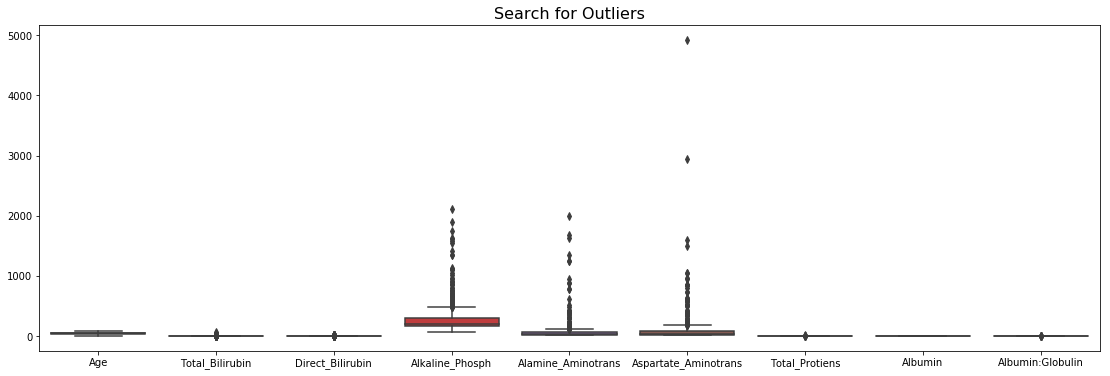

In [7]:
#Create box and whisker plot to see outliers; set plot size and title
plt.figure(figsize=(19,6))
bboxs = sns.boxplot(data=liver_df)
plt.title('Search for Outliers',fontsize=16)

Text(0.5,1,'Search for Outliers')

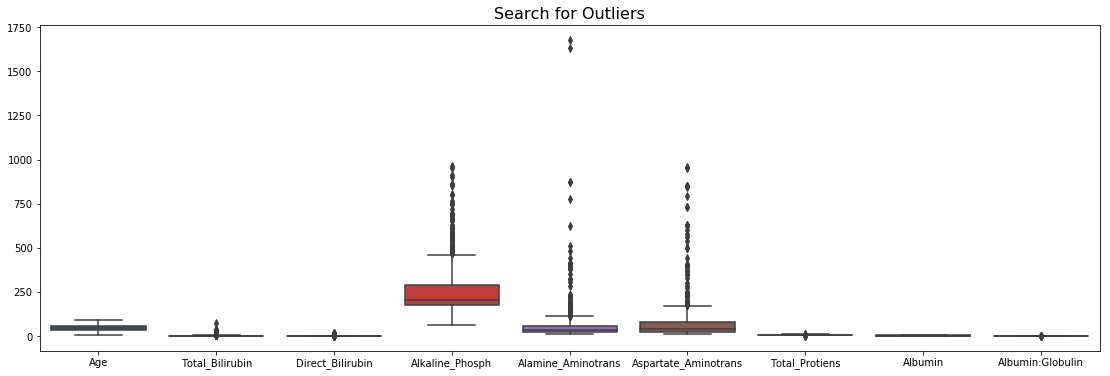

In [8]:
#Remove anything outside the 99th percentile for Aspartate Aminotransferase and Alkaline Phosphatase
qAsp = liver_df['Aspartate_Aminotrans'].quantile(0.99)
liver_df = liver_df[liver_df['Aspartate_Aminotrans'] < qAsp]
qAlk = liver_df['Alkaline_Phosph'].quantile(0.99)
liver_df = liver_df[liver_df['Alkaline_Phosph'] < qAsp]
#Display the same Plot as before with the outliers removed
plt.figure(figsize=(19,6))
bboxs = sns.boxplot(data=liver_df)
plt.title('Search for Outliers',fontsize=16)

In [9]:
#Describe the dataset
liver_df.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosph,Alamine_Aminotrans,Aspartate_Aminotrans,Total_Protiens,Albumin,Albumin:Globulin
count,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,560.000000
mean,44.574468,3.099291,1.386879,259.971631,67.815603,87.585106,6.495390,3.156738,0.953036
std,16.141463,6.048246,2.710752,147.985535,132.601279,139.286056,1.089664,0.796199,0.319971
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000
25%,33.000000,0.800000,0.200000,175.000000,23.000000,25.000000,5.800000,2.600000,0.700000
50%,45.000000,1.000000,0.300000,206.000000,34.000000,40.500000,6.600000,3.100000,0.985000
75%,57.000000,2.400000,1.200000,290.000000,59.000000,82.250000,7.200000,3.800000,1.100000
max,90.000000,75.000000,19.700000,962.000000,1680.000000,960.000000,9.600000,5.500000,2.800000


In [10]:
#Describe the correlation between variables
liver_df.corr()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosph,Alamine_Aminotrans,Aspartate_Aminotrans,Total_Protiens,Albumin,Albumin:Globulin
Age,1.000000,0.025590,0.017993,0.031999,-0.073162,-0.037146,-0.188751,-0.264455,-0.210918
Total_Bilirubin,0.025590,1.000000,0.863596,0.206122,0.121811,0.247777,-0.000955,-0.214979,-0.196321
Direct_Bilirubin,0.017993,0.863596,1.000000,0.234900,0.143736,0.276229,0.007201,-0.222850,-0.189961
Alkaline_Phosph,0.031999,0.206122,0.234900,1.000000,0.104498,0.116329,0.005181,-0.141442,-0.225169
Alamine_Aminotrans,-0.073162,0.121811,0.143736,0.104498,1.000000,0.775266,-0.022523,-0.011659,-0.004610
Aspartate_Aminotrans,-0.037146,0.247777,0.276229,0.116329,0.775266,1.000000,-0.033556,-0.114046,-0.101269
Total_Protiens,-0.188751,-0.000955,0.007201,0.005181,-0.022523,-0.033556,1.000000,0.784349,0.231609
Albumin,-0.264455,-0.214979,-0.222850,-0.141442,-0.011659,-0.114046,0.784349,1.000000,0.684475
Albumin:Globulin,-0.210918,-0.196321,-0.189961,-0.225169,-0.004610,-0.101269,0.231609,0.684475,1.000000


In [11]:
#Display a pivot table with the means of each numeric variable, split by What type of patient and the gender
pd.pivot_table(liver_df,index=['Dataset','Gender'])

Age  Alamine_Aminotrans   Albumin  \
Dataset           Gender                                            
Liver Patient     Female  43.023256           55.162791  3.262791   
                  Male    46.804487           89.653846  3.024359   
Non-Liver Patient Female  42.740000           29.740000  3.350000   
                  Male    40.517241           34.870690  3.350862   

                          Albumin:Globulin  Alkaline_Phosph  \
Dataset           Gender                                      
Liver Patient     Female          0.933529       274.209302   
                  Male            0.916624       281.804487   
Non-Liver Patient Female          1.007347       203.280000   
                  Male            1.042783       215.129310   

                          Aspartate_Aminotrans  Direct_Bilirubin  \
Dataset           Gender                                           
Liver Patient     Female             73.476744          1.076744   
                  Male              116.500000          2.009615   
Non-Liver Patient Female             31.840000          0.268000   
                  Male               44.301724          0.424138   

                          Total_Bilirubin  Total_Protiens  
Dataset           Gender                                   
Liver Patient     Female         2.472093        6.701163  
                  Male           4.333013        6.410256  
Non-Liver Patient Female         0.906000        6.580000  
                  Male           1.191379        6.535345

Text(0.5,1,'Aspartate Aminotransferase by Age')

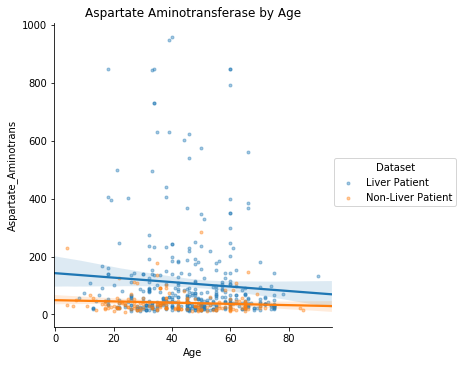

In [12]:
#Display a regression plot by age and amount of Aspartate Aminotransferase in the blood, split by type of patient along with a title
sns.lmplot(data=liver_df,x='Age',y='Aspartate_Aminotrans',hue='Dataset',scatter_kws={'alpha':0.4},markers='.')
plt.title('Aspartate Aminotransferase by Age')

## Section 2: Android App Data
The section data set I found was an excel table of Android App Data that had been scraped from the google store. We are going to look into what factors produce the highest ratings.

In [13]:
#Read in the data from an Excel file and display the first two rows
aapps_df = pd.read_excel(r"C:\Users\zgeorge\Dropbox (CMN Hospitals)\George\School\Fall 2018\Applied Machine Learning\practice_python\Homework 1\Android_Data.xlsx")
aapps_df.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0,Everyone,Art & Design,2018-01-07 00:00:00,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0,Everyone,Art & Design;Pretend Play,2018-01-15 00:00:00,2.0.0,4.0.3 and up


In [14]:
#Replace any string of "Free" with a "0" in the Price column
aapps_df['Price'].replace({'Free': 0})
#Remove any string of "F+" in the Installs column
aapps_df['Installs'].replace({"+": ""})
#Display the top five rows
aapps_df.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0,Everyone,Art & Design,2018-01-07 00:00:00,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0,Everyone,Art & Design;Pretend Play,2018-01-15 00:00:00,2.0.0,4.0.3 and up
2,"U Launcher Lite â€“ FREE Live Cool Themes, Hid...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0,Everyone,Art & Design,2018-08-01 00:00:00,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0,Teen,Art & Design,2018-06-08 00:00:00,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0,Everyone,Art & Design;Creativity,2018-06-20 00:00:00,1.1,4.4 and up


In [15]:
#Determine the number nulls in each column
null_columns=aapps_df.columns[aapps_df.isnull().any()]
aapps_df[null_columns].isnull().sum()

App                  1
Rating            1474
Type                 1
Content Rating       1
Current Ver          8
Android Ver          3
dtype: int64

In [16]:
#define a new function that allows us to view the nulls in each column.
def findnulls(col):
    print("***********", col ," NA's***********")
    print(aapps_df[aapps_df[col].isnull()][null_columns])

In [17]:
#Show the nulls in the 'Type' column
findnulls('Type')

*********** Type  NA's***********
                            App  Rating Type Content Rating  \
9148  Command & Conquer: Rivals     NaN  NaN   Everyone 10+   

             Current Ver         Android Ver  
9148  Varies with device  Varies with device  


In [18]:
#Show the nulls in the 'Content Rating' column
findnulls('Content Rating')

*********** Content Rating  NA's***********
                                           App  Rating Type Content Rating  \
10472  Life Made WI-Fi Touchscreen Photo Frame    19.0    0            NaN   

      Current Ver Android Ver  
10472  4.0 and up         NaN  


In [19]:
#Show the nulls in the 'Current Ver' column
findnulls('Current Ver')

*********** Current Ver  NA's***********
                                   App  Rating  Type Content Rating  \
15     Learn To Draw Kawaii Characters     3.2  Free       Everyone   
1553              Market Update Helper     4.1  Free       Everyone   
6322            Virtual DJ Sound Mixer     4.2  Free       Everyone   
6803                         BT Master     NaN  Free       Everyone   
7333                       Dots puzzle     4.0  Paid       Everyone   
7407                   Calculate My IQ     NaN  Free       Everyone   
7730                            UFO-CQ     NaN  Paid       Everyone   
10342                   La Fe de Jesus     NaN  Free       Everyone   

      Current Ver Android Ver  
15            NaN  4.2 and up  
1553          NaN  1.5 and up  
6322          NaN  4.0 and up  
6803          NaN  1.6 and up  
7333          NaN  4.0 and up  
7407          NaN  2.3 and up  
7730          NaN  2.0 and up  
10342         NaN  3.0 and up  


In [20]:
#Show the nulls in the 'Android Ver' column
findnulls('Android Ver')

*********** Android Ver  NA's***********
                                           App  Rating  Type Content Rating  \
4453                    [substratum] Vacuum: P     4.4  Paid       Everyone   
4490                      Pi Dark [substratum]     4.5  Free       Everyone   
10472  Life Made WI-Fi Touchscreen Photo Frame    19.0     0            NaN   

      Current Ver Android Ver  
4453          4.4         NaN  
4490          1.1         NaN  
10472  4.0 and up         NaN  


In [21]:
#Remove the affecting row
aapps_df = aapps_df[aapps_df.App != 'Life Made WI-Fi Touchscreen Photo Frame']
#Drop all other n/a's
aapps_df = aapps_df.dropna()

In [22]:
#Sort values by Price, high to low
aapps_df = aapps_df.sort_values('Price',ascending=False)
#Show first five rows
aapps_df.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7.3M,10000,Paid,400,Everyone,Lifestyle,2018-05-03 00:00:00,1.0.1,4.1 and up
5358,I am Rich!,FINANCE,3.8,93,22M,1000,Paid,399.99,Everyone,Finance,2017-12-11 00:00:00,1,4.1 and up
5373,I AM RICH PRO PLUS,FINANCE,4.0,36,41M,1000,Paid,399.99,Everyone,Finance,2018-06-25 00:00:00,1.0.2,4.1 and up
5369,I am Rich,FINANCE,4.3,180,3.8M,5000,Paid,399.99,Everyone,Finance,2018-03-22 00:00:00,1,4.2 and up
4197,most expensive app (H),FAMILY,4.3,6,1.5M,100,Paid,399.99,Everyone,Entertainment,2018-07-16 00:00:00,1,7.0 and up


In [23]:
#Remove anything above the 99th percentile in price
qPrice = aapps_df['Price'].quantile(0.99)
aapps_df = aapps_df[aapps_df["Price"] < qPrice]

In [24]:
#Convert the data in each column to the correct types, numeric or categorical
aapps_df[['Rating','Reviews','Installs','Price']] = aapps_df[['Rating','Reviews','Installs','Price']].apply(pd.to_numeric)
aapps_df[['Category','Type','Content Rating', 'Genres']] = aapps_df[['Category','Type','Content Rating', 'Genres']].astype('category')
#show each column and the data type for each
aapps_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9264 entries, 5909 to 10840
Data columns (total 13 columns):
App               9264 non-null object
Category          9264 non-null category
Rating            9264 non-null float64
Reviews           9264 non-null int64
Size              9264 non-null object
Installs          9264 non-null int64
Type              9264 non-null category
Price             9264 non-null float64
Content Rating    9264 non-null category
Genres            9264 non-null category
Last Updated      9264 non-null object
Current Ver       9264 non-null object
Android Ver       9264 non-null object
dtypes: category(4), float64(2), int64(2), object(5)
memory usage: 767.6+ KB


In [25]:
#Describe the data in each column
aapps_df.describe()

,Rating,Reviews,Installs,Price
count,9264.000000,9.264000e+03,9.264000e+03,9264.000000
mean,4.192206,5.196866e+05,1.809411e+07,0.182596
std,0.515496,3.160844e+06,9.171982e+07,0.837572
min,1.000000,1.000000e+00,1.000000e+00,0.000000
25%,4.000000,1.950000e+02,1.000000e+04,0.000000
50%,4.300000,6.190500e+03,5.000000e+05,0.000000
75%,4.500000,8.391250e+04,5.000000e+06,0.000000
max,5.000000,7.815831e+07,1.000000e+09,8.490000


In [34]:
#Create Pivot table with average Rating and Price for each app category and sort by price
toptable1 = aapps_df.pivot_table(['Rating','Price'],'Category')
toptable1 = toptable1.sort_values('Price', ascending=False)
#Print top five rows of pivot table
toptable1.head(5)

,Price,Rating
Category,,
MEDICAL,0.589126,4.187702
WEATHER,0.392400,4.244000
PERSONALIZATION,0.373891,4.335370
FAMILY,0.252792,4.189611
TOOLS,0.243393,4.047059


Text(0.5,1,'Average Price and Rating by Category')

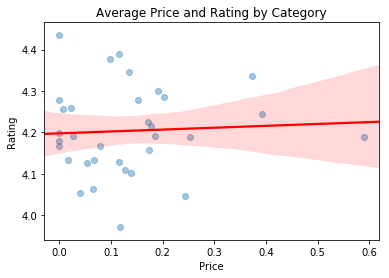

In [36]:
#show scatter plot of average rating and price for each category with regression line
sns.regplot('Price','Rating',toptable1,scatter_kws= {'alpha': 0.4},line_kws={'color':'red'})
plt.title('Average Price and Rating by Category')

C:\Users\zgeorge\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\zgeorge\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(4.5,1.2,'All Price and Ratings & their Distributions')

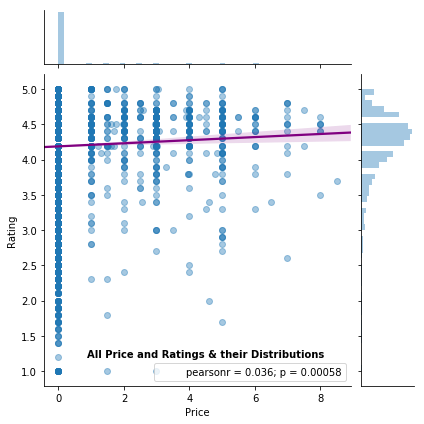

In [84]:
#Create joint plot from Price and Rating data
joint1 = sns.jointplot('Price','Rating',aapps_df,joint_kws= {'alpha': 0.4},)
#Create regression plot from same data, then overlap plots
joint2=sns.regplot('Price','Rating',aapps_df, ax=joint1.ax_joint, scatter=False,color='purple')
#despine
sns.despine()
#Place title on graph
joint2.text(4.5, 1.2, "All Price and Ratings & their Distributions", horizontalalignment='center', size='medium', color='black', weight='semibold')

(0, 5)

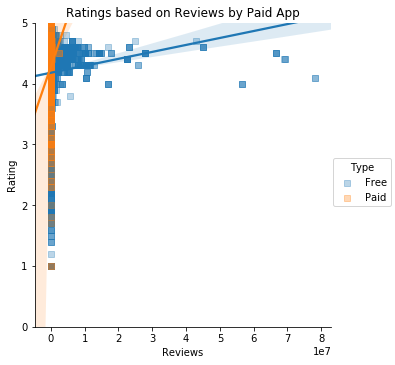

In [106]:
#Set palatte to muted
sns.color_palette(palette='muted')
#Create lmplot of Reviews and Ratings based on whether app is paid or not
sns.lmplot('Reviews','Rating',aapps_df,scatter_kws={'alpha':0.3}, markers=',',hue='Type')
#despine the plot
sns.despine()
#Set the Title of the graph from here
plt.title('Ratings based on Reviews by Paid App')
#Set the y-axis limits to a max of 5
plt.ylim(0,5)


## Section 3: Presc Data